In [1]:
#숙제 2017, 10, 24 1. 이 문제는 교재의 3장 Exercise 중 9번 문제로 “auto.csv” (http://www-bcf.usc.edu/~gareth/ISL/data.html) 
#를 이용한 multiple linear regression에 관한 내용입니다. 
#(a) ~ (f) 문제 중 (d)번 문제를 제외하고 다 수행하십시오. 
#2. 이 문제는 교재의 4장 Exercise 중 13번 문제로 “Boston” 데이터를 이용한 Classification에 관한 것입니다. 
#내용은 어떤 지역의 범죄율 (crim) 이 그 중간값보다 높을까 또는 낮을까를 나타내는 예측모델을 만드는 것입니다. 
#적절한 변수들을 선택해 Logistic Regression과 KNN 모델을 만들어 데이터에 적용하고, 그 결과를 설명하십시오. 
#모델 설명 및 평가는 오늘 배울 내용인 train/test set 방법 및 K-fold cross validation을 사용해야 합니다.

In [2]:
# 패키지 imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import statsmodels.formula.api as smf
import scipy

%matplotlib inline

In [3]:
np.__version__ , pd.__version__, seaborn.__version__

('1.13.3', '0.20.3', '0.8.0')

In [4]:
# pandas의 DataFrame으로 읽음.  
auto = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Auto.csv', na_values='?').dropna()
auto = auto.dropna()
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [5]:
#mpg miles per gallon
#cylinders Number of cylinders between 4 and 8
#displacement Engine displacement (cu. inches)
#horsepower Engine horsepower
#weight Vehicle weight (lbs.)
#acceleration Time to accelerate from 0 to 60 mph (sec.)
#year Model year (modulo 100)
#origin Origin of car (1. American, 2. European, 3. Japanese) 
#name Vehicle name

In [6]:
#origin은 categorical이므로 3개의 dummy variable로 만듦
auto['origin_american']=np.where(auto.origin==1,1,0)
auto['origin_european']=np.where(auto.origin==2,1,0)
auto['origin_japanese']=np.where(auto.origin==3,1,0)
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,origin_american,origin_european,origin_japanese
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,1,0,0


In [7]:
auto.shape

(392, 12)

In [8]:
auto.index, auto.columns

(Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
             ...
             387, 388, 389, 390, 391, 392, 393, 394, 395, 396],
            dtype='int64', length=392),
 Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
        'acceleration', 'year', 'origin', 'name', 'origin_american',
        'origin_european', 'origin_japanese'],
       dtype='object'))

In [9]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 12 columns):
mpg                392 non-null float64
cylinders          392 non-null int64
displacement       392 non-null float64
horsepower         392 non-null float64
weight             392 non-null int64
acceleration       392 non-null float64
year               392 non-null int64
origin             392 non-null int64
name               392 non-null object
origin_american    392 non-null int64
origin_european    392 non-null int64
origin_japanese    392 non-null int64
dtypes: float64(4), int64(7), object(1)
memory usage: 39.8+ KB


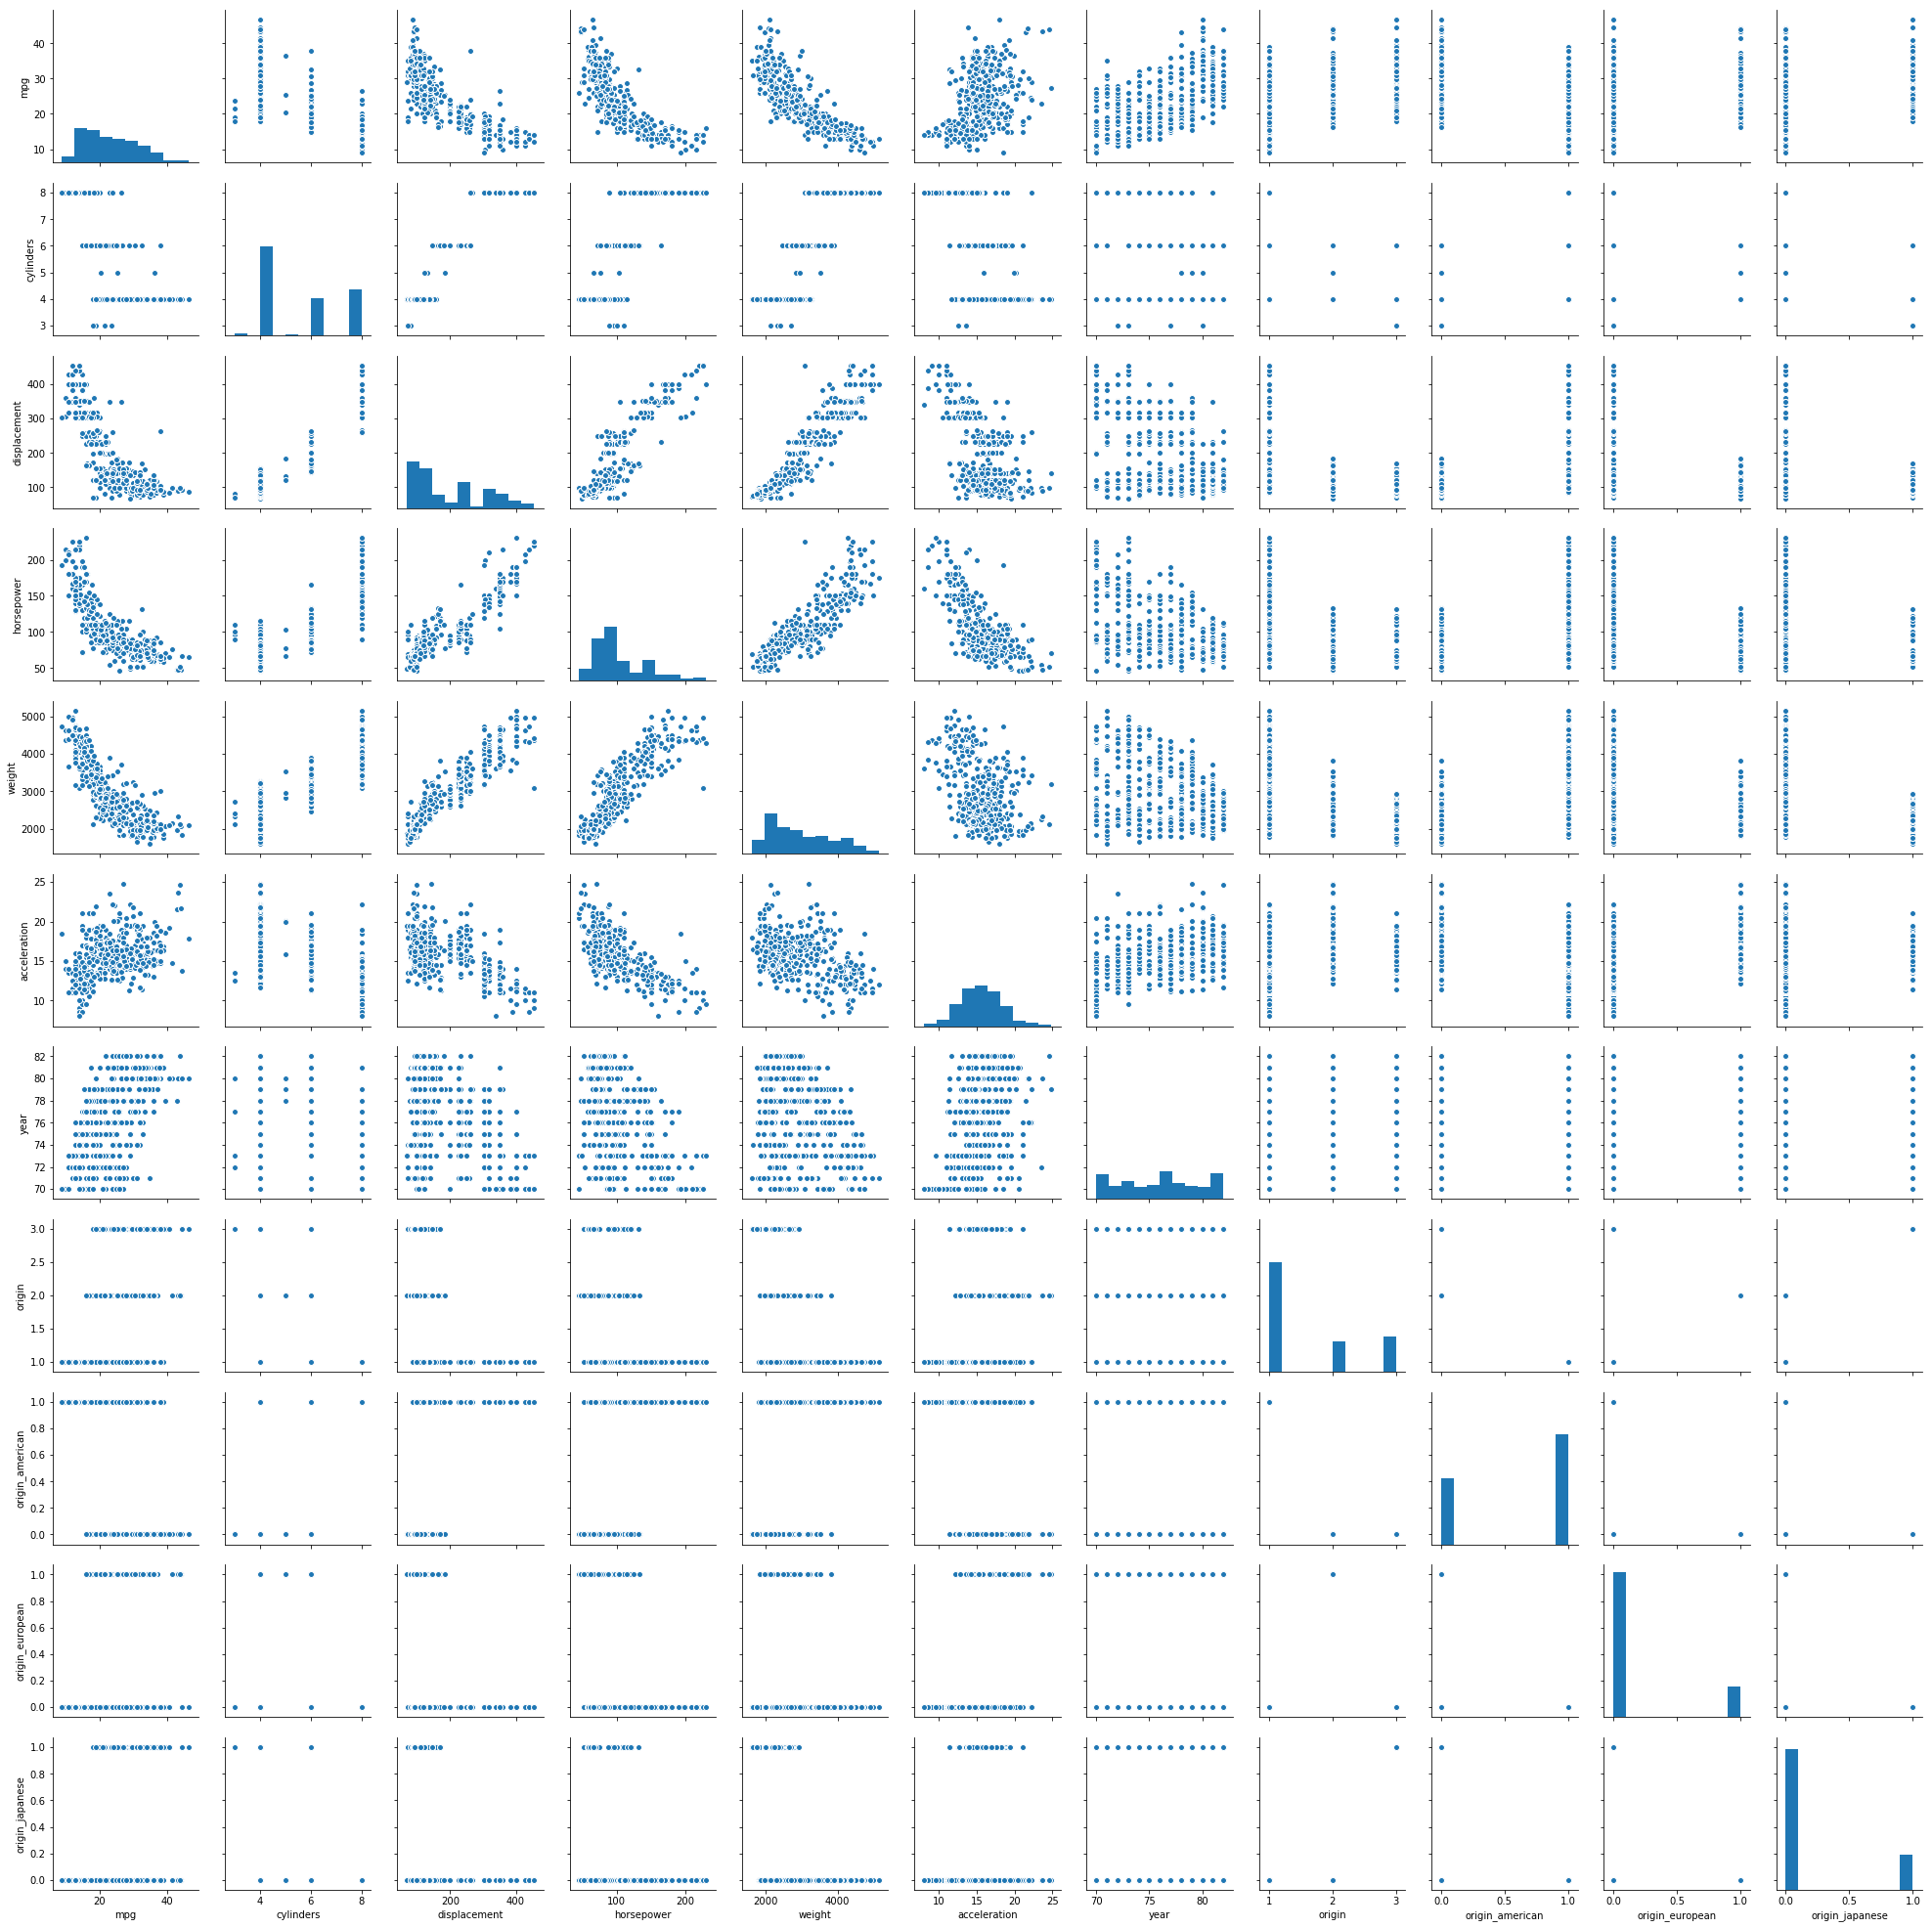

In [10]:
#a. Produce a scatterplot matrix which includes all of the variables in the data set.
seaborn.pairplot(auto)

In [11]:
#b. Compute the matrix of correlations between the variables using the function cor(). 
#You will need to exclude the name variable, which is qualitative.

In [12]:
corr=auto.corr()
corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,origin_american,origin_european,origin_japanese
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209,-0.565161,0.244313,0.451454
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932,0.610494,-0.352324,-0.404209
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535,0.655936,-0.371633,-0.440825
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,0.489625,-0.284948,-0.321936
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005,0.600978,-0.293841,-0.447929
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746,-0.258224,0.208298,0.115020
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528,-0.136065,-0.037745,0.199841
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000,-0.925180,0.241148,0.888933
origin_american,-0.565161,0.610494,0.655936,0.489625,0.600978,-0.258224,-0.136065,-0.925180,1.000000,-0.591434,-0.648583
origin_european,0.244313,-0.352324,-0.371633,-0.284948,-0.293841,0.208298,-0.037745,0.241148,-0.591434,1.000000,-0.230157


In [13]:
#c. Use the lm() function to perform a multiple linear regression with mpg as the response 
#and all other variables except name as the predictors.

In [14]:
lm = smf.ols(formula='mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin', data=auto).fit()   

# 학습된 모델의 coefficients
lm.params

Intercept      -17.218435
cylinders       -0.493376
displacement     0.019896
horsepower      -0.016951
weight          -0.006474
acceleration     0.080576
year             0.750773
origin           1.426140
dtype: float64

In [15]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Mon, 13 Nov 2017   Prob (F-statistic):          2.04e-139
Time:                        05:09:22   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
#i. Is there a relationship between the predictors and the response?
#F-statistic의 p-value가 매우 작으므로 의미있는 모델임

#ii. Which predictors appear to have a statistically significant relationship to the response?
#weight, year, origin, displacement의 p-value가 작으므로 의미있는 predictor
#acceleration, horsepower, cylinders는 null-hypothesis를 거부할 수 없음

#iii. What does the coefficient for the year variable suggest?
#year의 coefficient가 0.75이므로 year가 1 커지면(1년 늦어지면) response인 mpg는 0.75 늘어남

In [17]:
#Interactions between predictors
lm_interaction = smf.ols(formula='mpg ~ displacement + weight + year + origin + displacement:weight + weight:year + year:origin + displacement:year + displacement:origin + weight:origin', data=auto).fit()
lm_interaction.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     235.6
Date:                Mon, 13 Nov 2017   Prob (F-statistic):          2.41e-156
Time:                        05:09:22   Log-Likelihood:                -974.75
No. Observations:                 392   AIC:                             1971.
Df Residuals:                     381   BIC:                             2015.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -17.9183     24.959     -0.718      0.473     -66.993      31.156
displacement            0.0338      0.083      0.408      0.684      -0.129       0.197
weight                 -0.0083      0.011     -0.740      0.460      -0.030       0.014
year                    0.9045      0.324      2.795      0.005       0.268       1.541
origin                 -5.6486      5.352     -1.055      0.292     -16.173       4.876
displacement:weight  1.806e-05   2.76e-06      6.540      0.000    1.26e-05    2.35e-05
weight:year          5.751e-06      0.000      0.038      0.970      -0.000       0.000
year:origin             0.0946      0.066      1.429      0.154      -0.036       0.225
displacement:year      -0.0016      0.001     -1.401      0.162      -0.004       0.001
displacement:origin     0.0160      0.013      1.258      0.209      -0.009       0.041
weight:origin          -0.0013      0.001     -1.418      0.157      -0.003       0.001
==============================================================================
Omnibus:                       76.322   Durbin-Watson:                   1.433
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.097
Skew:                           0.890   Prob(JB):                     4.86e-50
Kurtosis:                       6.276   Cond. No.                     1.47e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
#Interactions between predictors
lm_interaction = smf.ols(formula='mpg ~ displacement + weight + year + origin + displacement:weight + displacement:year', data=auto).fit()
lm_interaction.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     391.0
Date:                Mon, 13 Nov 2017   Prob (F-statistic):          2.22e-160
Time:                        05:09:22   Log-Likelihood:                -977.18
No. Observations:                 392   AIC:                             1968.
Df Residuals:                     385   BIC:                             1996.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -34.3876      7.309     -4.705      0.000     -48.758     -20.018
displacement            0.0787      0.037      2.132      0.034       0.006       0.151
weight                 -0.0097      0.001    -14.531      0.000      -0.011      -0.008
year                    1.1465      0.090     12.785      0.000       0.970       1.323
origin                  0.3049      0.252      1.208      0.228      -0.191       0.801
displacement:weight  1.837e-05   2.26e-06      8.133      0.000    1.39e-05    2.28e-05
displacement:year      -0.0019      0.000     -4.193      0.000      -0.003      -0.001
==============================================================================
Omnibus:                       65.971   Durbin-Watson:                   1.454
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.969
Skew:                           0.767   Prob(JB):                     1.69e-43
Kurtosis:                       6.116   Cond. No.                     4.13e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.13e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
#Interactions between predictors
lm_interaction = smf.ols(formula='mpg ~ displacement*weight*year', data=auto).fit()
lm_interaction.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     336.0
Date:                Mon, 13 Nov 2017   Prob (F-statistic):          2.04e-159
Time:                        05:09:22   Log-Likelihood:                -976.35
No. Observations:                 392   AIC:                             1969.
Df Residuals:                     384   BIC:                             2000.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  -84.3652     31.280     -2.697      0.007    -145.866     -22.864
displacement                 0.3434      0.197      1.744      0.082      -0.044       0.731
weight                       0.0085      0.013      0.642      0.521      -0.018       0.034
displacement:weight      -6.589e-05   5.06e-05     -1.303      0.193      -0.000    3.35e-05
year                         1.8281      0.413      4.430      0.000       1.017       2.640
displacement:year           -0.0056      0.003     -2.082      0.038      -0.011      -0.000
weight:year                 -0.0002      0.000     -1.395      0.164      -0.001    9.96e-05
displacement:weight:year  1.144e-06   6.82e-07      1.677      0.094   -1.97e-07    2.49e-06
==============================================================================
Omnibus:                       74.085   Durbin-Watson:                   1.435
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.387
Skew:                           0.849   Prob(JB):                     9.38e-51
Kurtosis:                       6.350   Cond. No.                     1.31e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
lm_log = smf.ols(formula='mpg ~ np.log(displacement) + np.log(weight) + year + origin', data=auto).fit()   
lm_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     512.5
Date:                Mon, 13 Nov 2017   Prob (F-statistic):          3.85e-153
Time:                        05:09:22   Log-Likelihood:                -1000.5
No. Observations:                 392   AIC:                             2011.
Df Residuals:                     387   BIC:                             2031.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              112.4243      9.887     11.370      0.000      92.984     131.864
np.log(displacement)    -0.5106      0.977     -0.523      0.602      -2.432       1.410
np.log(weight)         -18.3871      1.701    -10.808      0.000     -21.732     -15.042
year                     0.7750      0.046     16.962      0.000       0.685       0.865
origin                   0.6982      0.267      2.618      0.009       0.174       1.223
==============================================================================
Omnibus:                       54.092   Durbin-Watson:                   1.324
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.905
Skew:                           0.699   Prob(JB):                     1.02e-28
Kurtosis:                       5.437   Cond. No.                     4.87e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
lm_sqrt = smf.ols(formula='mpg ~ np.sqrt(displacement) + np.sqrt(weight) + year + origin', data=auto).fit()   
lm_sqrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     475.6
Date:                Mon, 13 Nov 2017   Prob (F-statistic):          6.70e-148
Time:                        05:09:22   Log-Likelihood:                -1012.8
No. Observations:                 392   AIC:                             2036.
Df Residuals:                     387   BIC:                             2055.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.9597      4.246      0.226      0.821      -7.388       9.307
np.sqrt(displacement)     0.0454      0.141      0.321      0.749      -0.233       0.323
np.sqrt(weight)          -0.7052      0.063    -11.248      0.000      -0.828      -0.582
year                      0.7696      0.048     16.143      0.000       0.676       0.863
origin                    0.9562      0.266      3.594      0.000       0.433       1.479
==============================================================================
Omnibus:                       46.146   Durbin-Watson:                   1.301
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.277
Skew:                           0.633   Prob(JB):                     2.77e-22
Kurtosis:                       5.115   Cond. No.                     2.46e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
lm_square = smf.ols(formula='np.square(mpg) ~ displacement + weight + np.square(year) + origin', data=auto).fit()   
lm_square.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.square(mpg)   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     258.2
Date:                Mon, 13 Nov 2017   Prob (F-statistic):          8.10e-108
Time:                        05:09:22   Log-Likelihood:                -2649.2
No. Observations:                 392   AIC:                             5308.
Df Residuals:                     387   BIC:                             5328.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -256.1014    143.100     -1.790      0.074    -537.451      25.249
displacement        0.7069      0.298      2.368      0.018       0.120       1.294
weight             -0.3365      0.035     -9.643      0.000      -0.405      -0.268
np.square(year)     0.2757      0.021     13.438      0.000       0.235       0.316
origin             86.0095     16.730      5.141      0.000      53.116     118.903
==============================================================================
Omnibus:                      122.127   Durbin-Watson:                   1.300
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              445.862
Skew:                           1.358   Prob(JB):                     1.52e-97
Kurtosis:                       7.463   Cond. No.                     8.83e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.83e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""